dataset: https://www.kaggle.com/dalpozz/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

FILE_NAME = 'creditcard.csv'

In [2]:
#load data
full_data = pd.read_csv(FILE_NAME)

#rename the 'Class' column
full_data.rename(columns = {'Class': 'Label'}, inplace = True)

#let's take a peek
print full_data.shape
full_data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.utils import shuffle
full_data = shuffle(full_data)

# Seperate target labels
labels = full_data['Label']

times = full_data['Time']
features = full_data.drop(['Time', 'Label'], axis=1)

# Get some specifics on our dataset
print "Data consists of {} instances of data with {} total features with value counts of \n{}".format(
    features.shape[0], features.shape[1], labels.value_counts())
print "Where 0 indicates a legitimate transaction and 1 indicates fraud"

Data consists of 284807 instances of data with 29 total features with value counts of 
0    284315
1       492
Name: Label, dtype: int64
Where 0 indicates a legitimate transaction and 1 indicates fraud


In [4]:
from sklearn.preprocessing import StandardScaler

# Scale the amount spent
features['normAmount'] = StandardScaler().fit_transform(features['Amount'].reshape(-1, 1))

In [5]:
amounts = features['Amount']
features = features.drop(['Amount'], axis=1)
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
42914,1.328755,-0.667281,0.143056,-0.525633,-1.193573,-1.171937,-0.389395,-0.194001,-0.661954,0.734371,...,-0.515663,-0.384769,-0.798811,0.033199,0.379640,0.198983,1.042043,-0.085049,0.007608,-0.165319
64702,-2.073365,1.212988,-0.210357,-3.817156,-0.342807,-1.086642,-0.385260,-0.907403,1.565272,-2.545380,...,-0.710325,1.419176,-0.815893,-0.130419,-0.460201,0.480698,-1.173772,0.126028,-0.014738,-0.329041
23423,-8.913464,-7.608227,1.337346,-0.145191,1.546935,-0.219715,3.960317,-3.785540,3.959629,3.356782,...,-7.157627,-2.924978,1.494810,2.426169,0.311150,1.370135,0.838952,-2.138323,0.008645,1.026110
113824,1.290819,0.086102,-1.302560,-0.056117,2.253052,3.293045,-0.354302,0.763154,-0.153879,0.072484,...,-0.009015,-0.022624,-0.178238,-0.139225,1.004248,0.846114,-0.313342,0.015407,0.014375,-0.317247
109444,-0.358580,0.966068,1.145574,-0.118194,0.114540,-0.506351,0.493812,0.182737,-0.399004,-0.295956,...,0.033848,-0.252584,-0.763710,-0.053691,-0.095451,-0.198796,0.080296,0.231897,0.081307,-0.346073


In [21]:
#?????????????????
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
from imblearn.over_sampling import SMOTE

# implement synthetic minority oversampling technique for a more balanced dataset to feed our model
oversampler = SMOTE(random_state=331)
os_features, os_labels = oversampler.fit_sample(features, labels)

In [7]:
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer, confusion_matrix

f1_scorer = make_scorer(f1_score, pos_label = 0)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(os_features, os_labels, test_size = .3)

# Let's get an idea of what our new oversampled data looks like

print 'training instances of data:' , len(y_train) 
print 'training instances of fraud' , np.count_nonzero(y_train)
print 'testing instances of data:' , len(y_test) 
print 'testing instances of fraud:' , np.count_nonzero(y_test)

training instances of data: 398041
training instances of fraud 199140
testing instances of data: 170589
testing instances of fraud: 85175


In [19]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

print "For Random Forest Classifier:"
rfscores = cross_val_score(rf, os_features, os_labels, scoring = f1_scorer)
print rfscores, rfscores.mean()

print "For K-Nearest Neighbors Classifier:"
knnscores = cross_val_score(knn, os_features, os_labels, scoring = f1_scorer)
print knnscores, knnscores.mean()


For Random Forest Classifier:
[ 0.99984698  0.99977312  0.99988392] 0.999834673774
For K-Nearest Neighbors Classifier:
[ 0.99902831  0.99874278  0.998986  ] 0.998919028957


In [20]:
#majority vote benchmark without oversampling
majority_vote_predictions = np.zeros(features.shape[0])
print "f1 score for simple majority vote is " , f1_score(labels, majority_vote_predictions, pos_label = 0)

f1 score for simple majority vote is  0.999135510488


In [22]:
rf_params = {'n_estimators' : np.arange(10, 110, 15),
                'min_samples_split': np.arange(2, 8, 2),
                'max_features': np.arange(1, 29, 4),
                'criterion': ['gini', 'entropy']}


rf_tune = RandomizedSearchCV(rf, rf_params, n_iter = 25, scoring = f1_scorer, verbose = 3)

rf_tune = rf_tune.fit(os_features, os_labels)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] n_estimators=10, min_samples_split=6, criterion=entropy, max_features=21 
[CV]  n_estimators=10, min_samples_split=6, criterion=entropy, max_features=21, score=0.999847 -   2.0s
[CV] n_estimators=10, min_samples_split=6, criterion=entropy, max_features=21 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=6, criterion=entropy, max_features=21, score=0.999784 -   0.2s
[CV] n_estimators=10, min_samples_split=6, criterion=entropy, max_features=21 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.6min remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=6, criterion=entropy, max_features=21, score=0.999810 -   0.2s
[CV] n_estimators=25, min_samples_split=2, criterion=entropy, max_features=13 
[CV]  n_estimators=25, min_samples_split=2, criterion=entropy, max_features=13, score=0.999847 -   0.6s
[CV] n_estimators=25, min_samples_split=2, criterion=entropy, max_features=13 
[CV]  n_estimators=25, min_samples_split=2, criterion=entropy, max_features=13, score=0.999836 -   0.6s
[CV] n_estimators=25, min_samples_split=2, criterion=entropy, max_features=13 
[CV]  n_estimators=25, min_samples_split=2, criterion=entropy, max_features=13, score=0.999858 -   0.6s
[CV] n_estimators=100, min_samples_split=4, criterion=gini, max_features=25 
[CV]  n_estimators=100, min_samples_split=4, criterion=gini, max_features=25, score=0.999583 -   4.2s
[CV] n_estimators=100, min_samples_split=4, criterion=gini, max_features=25 
[CV]  n_estimators=100, min_samples_split=4, criterion=gini, max_features=25, score=0.99959

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 908.1min finished


In [23]:
print rf_tune.best_estimator_ , '\nf1 score:' , rf_tune.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=70, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 
f1 score: 0.999878640823


In [24]:
rft = rf_tune.best_estimator_
rft.fit_transform(X_train, y_train)

rfu = RandomForestClassifier()
rfu.fit_transform(X_train, y_train)

C:\Users\Sunny\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Sunny\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  6.77979815,  -2.4083033 ,  -6.78178904, ..., -11.51279393,
         -2.64945294,  -3.14909065],
       [  4.64240508,  -4.99037778,  -5.86794173, ...,  -7.66904746,
         -7.7372006 , -13.11827082],
       [  1.08121135,  -1.18875625,   0.43640721, ...,   2.49536783,
          0.5319671 ,   0.96720549],
       ..., 
       [  4.33728493,  -3.8956539 ,  -4.93466896, ...,  -6.65599087,
         -3.77057018,  -3.96300091],
       [  5.17480293,  -4.51445392,  -0.27586251, ...,  -7.94539257,
         -1.69056425,  -3.27894219],
       [ -1.22037931,  -0.76978865,   1.29833454, ...,  -0.6222773 ,
         -0.23289928,   0.35035864]])

In [25]:
# Check performances of tuned and untuned models
print "f1 testing score for tuned random forest is ", f1_score(y_test, rft.predict(X_test), pos_label = 0)

print "f1 testing score for random forest is " , f1_score(y_test, rfu.predict(X_test), pos_label = 0)

f1 testing score for tuned random forest is  0.999900474794
f1 testing score for random forest is  0.999777551427


oops, looks like I could have chosen a better selection of hyper parameters for the randomized search cross validation optimization

In [26]:
confusion_matrix(y_test, rft.predict(X_test))

array([[85397,    17],
       [    0, 85175]])

In [ ]:
#now let's try a neural network

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.utils.np_utils import to_categorical

Using Theano backend.


In [57]:
# Let's build a model

# add regularization
# needs more tuning
model = Sequential()
model.add(Dense(40, input_dim = X_train.shape[1], activation = 'tanh', init = 'lecun_uniform', W_regularizer = l2(.001)))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'tanh', init = 'lecun_uniform', W_regularizer = l2(.001)))
model.add(Dense(4, activation = 'tanh', init = 'lecun_uniform'))
model.add(Dense(output_dim = 1, activation = 'sigmoid'))

sgd = SGD(lr = .15, momentum = .85, decay = .001)

model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['fmeasure'])

In [58]:
history = model.fit(X_train, y_train, nb_epoch = 331, batch_size = 1000, verbose = 2, 
                    validation_split = .20, shuffle = True)

Train on 318432 samples, validate on 79609 samples
Epoch 1/331
2s - loss: 0.1508 - fmeasure: 0.9554 - val_loss: 0.0650 - val_fmeasure: 0.9734
Epoch 2/331
2s - loss: 0.0951 - fmeasure: 0.9721 - val_loss: 0.0520 - val_fmeasure: 0.9777
Epoch 3/331
2s - loss: 0.0797 - fmeasure: 0.9773 - val_loss: 0.0446 - val_fmeasure: 0.9830
Epoch 4/331
2s - loss: 0.0721 - fmeasure: 0.9802 - val_loss: 0.0386 - val_fmeasure: 0.9865
Epoch 5/331
2s - loss: 0.0663 - fmeasure: 0.9826 - val_loss: 0.0383 - val_fmeasure: 0.9867
Epoch 6/331
2s - loss: 0.0620 - fmeasure: 0.9841 - val_loss: 0.0338 - val_fmeasure: 0.9895
Epoch 7/331
2s - loss: 0.0596 - fmeasure: 0.9852 - val_loss: 0.0329 - val_fmeasure: 0.9883
Epoch 8/331
2s - loss: 0.0578 - fmeasure: 0.9861 - val_loss: 0.0295 - val_fmeasure: 0.9904
Epoch 9/331
2s - loss: 0.0551 - fmeasure: 0.9873 - val_loss: 0.0283 - val_fmeasure: 0.9902
Epoch 10/331
2s - loss: 0.0537 - fmeasure: 0.9877 - val_loss: 0.0272 - val_fmeasure: 0.9911
Epoch 11/331
2s - loss: 0.0523 - fmeas

In [59]:
predictions = model.predict(X_test)
predictions[:] = predictions[:]>0.5

print "Our Neural Network achieves an f1 score of " , f1_score(y_test, predictions, pos_label = 0) , "on the oversampled testing data"
confusion_matrix(y_test, predictions)

# add f1 score on original data set, train test split on features labels earlier 

Our Neural Network achieves an f1 score of  0.995686564884 on the oversampled testing data


array([[84716,   698],
       [   36, 85139]])

<function matplotlib.pyplot.show>

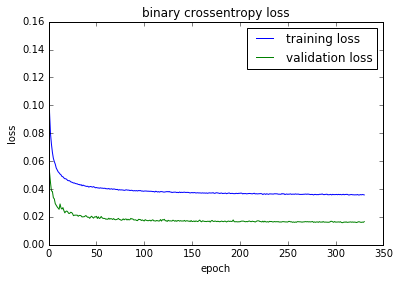

In [60]:
# Plot training loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('binary crossentropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.show